In [53]:
from __future__ import print_function
__author__ = 'mo'
import pylab as pl
import numpy as np
%pylab inline

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gp
import json

import sklearn.cluster
from sklearn import mixture
from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [69]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

In [45]:
import os
print (os.environ['PUI2015'])
#"HOME" in os.environ

/Users/mariaortiz/PUI2015_mortiz/


In [15]:
#imco = pd.read_csv(os.getenv('$PUI2015')+'/ExtraCredit/imcodata2.csv')
imco = pd.read_csv('/Users/mariaortiz/PUI2015/CA_Final/imcodata2.csv')
imco.columns


Index([u'ciudad', u'clave', u'estado',
       u'Tasa homicidios Por cada cien mil habitantes',
       u'Robo de mercancias: Pesos 2012 por cada millon de pesos de PIB',
       u'safetyperception', u'mtCO2e',
       u'Proporcion del area del municipio con acuiferos sobreexplotados',
       u'waterpc', u'cap tratamiento de agua l/s por cada 1,000 hab',
       u'indice, \rValores de 0-3, en funcion a si mide, publica datos y tiene un Proaire',
       u'goodtrash', u'Aprovecha biogas Si=1, No=0', u'fuelpergdp',
       u'rend academico �% de alumnos de educacion basica y media superior en niveles Bueno y Excelente en Matematicas de prueba ENLACE',
       u'% de escuelas excelentes dentro del municipio',
       u'mortalidad diabetes Por cada 10 mil habitantes',
       u'mort infantil Decesos de menores de un a�o por cada mil nacidos vivos',
       u'Por cada 10 mil habitantes', u'acceso inst salud % de la PEA',
       u'crec accesso salud Tasa de cambio (%) entre 2008 y 2012',
       u' crec

In [11]:
#imco.describe()

In [25]:
#creating df for variables I want to look 
imcoenv = imco[['ciudad', 'mtCO2e', 'waterpc', 'goodtrash', 'fuelpergdp', 'citygrowth', 'popdensity', 'population']]

In [46]:
inf = imco['inf']
citygrowth = imco['citygrowth']
popden = imco['popdensity']
eleccons = imco['fuelpergdp']
waterpc = imco['waterpc']
pop = imco['population']
cityindex = imco['ciudad']
trash = imco['goodtrash']
co2 = imco['mtCO2e']

In [29]:
#imcoenv

In [78]:
pop.max()

20848057.69

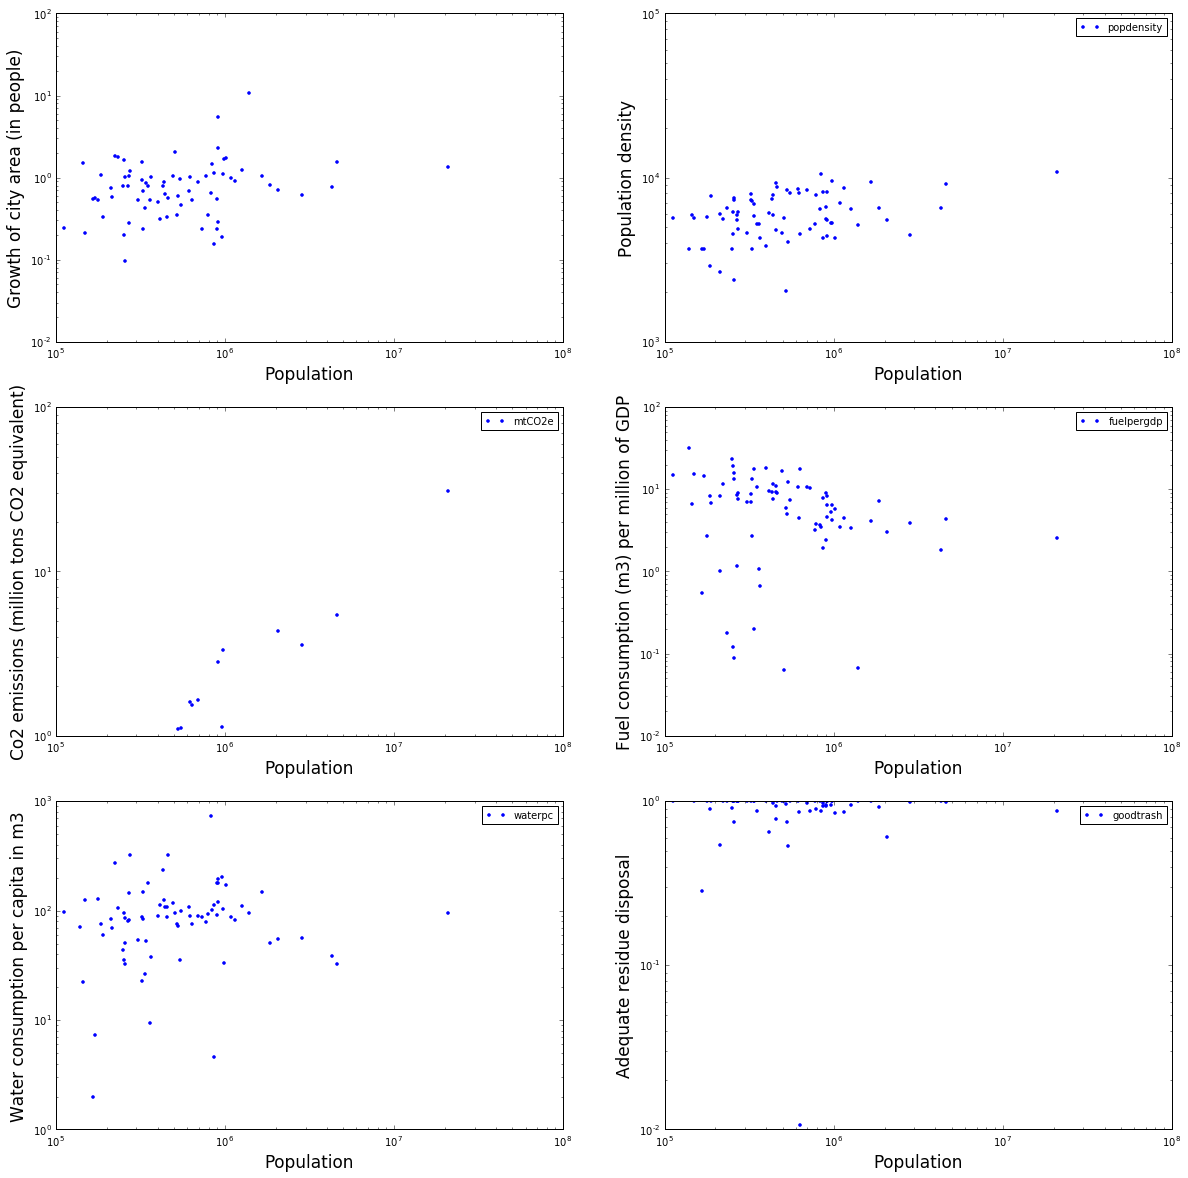

In [47]:
#looking at relationship with population

fig = pl.figure(figsize=(20,20))

pl.subplot(3,2,1)
pl.loglog(pop, citygrowth, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Growth of city area (in people)', fontsize=17)
#pl.legend(loc = 0, fontsize = 10)
#ax.setaxlim(0, 2000000)

pl.subplot(3,2,2)
pl.loglog(pop, popden, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Population density', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,3)
pl.loglog(pop, co2, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Co2 emissions (million tons CO2 equivalent)', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,4)
pl.loglog(pop, eleccons, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Fuel consumption (m3) per million of GDP', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,5)
pl.loglog(pop, waterpc, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Water consumption per capita in m3', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

pl.subplot(3,2,6)
pl.loglog(pop, trash, '.')
pl.xlabel('Population', fontsize=17)
pl.ylabel('Adequate residue disposal', fontsize=17)
pl.legend(loc = 0, fontsize = 10)

In [80]:
#the column for mtCO2e has some nan values, so we remove them
#creating an index that shows where nan values are 
index = np.isnan(imcoenv.mtCO2e)
#resaving df with rows for where we have mtCO2e data 
final = imcoenv[index == 0]
final

,ciudad,mtCO2e,waterpc,goodtrash,fuelpergdp,citygrowth,popdensity,population
0,Aguascalientes,3.33,103.385094,1.000000,4.187821,1.117441,9562.758974,972704.1793
19,Valle de Mexico,31.00,95.939993,0.866844,2.543544,1.333303,10856.891050,20848057.6900
21,Celaya,1.61,89.350793,0.857107,4.446439,1.023992,8044.428113,623000.7126
23,Irapuato,1.11,99.282031,1.000000,7.418034,0.466669,8010.209477,550150.5493
34,Guadalajara,5.46,32.825935,0.994760,4.401677,1.528756,9128.080683,4614710.4160
37,Toluca,4.32,55.058674,0.608675,3.035340,0.700000,5499.108157,2074353.4870
42,Cuernavaca,1.13,203.300064,0.954138,5.248958,0.186698,5300.653295,962252.3736
45,Oaxaca,1.54,75.119816,0.010631,17.660090,0.537110,4523.197679,635210.7173
47,Puebla-Tlaxcala,3.55,56.156507,0.993844,3.900561,0.618987,4451.460824,2848670.6410
56,Culiacan,2.80,178.518826,1.000000,8.417036,0.289686,8130.089028,907938.5251


In [55]:
import scipy
import sklearn.cluster
#from sklearn import mixture
#from PIL import Image
from scipy.misc import imread
from scipy.cluster.vq import kmeans2, vq, whiten, kmeans

In [60]:
final2 = final.set_index(['ciudad'])
final2

,mtCO2e,waterpc,goodtrash,fuelpergdp,citygrowth,popdensity,population
ciudad,,,,,,,
Aguascalientes,3.33,103.385094,1.000000,4.187821,1.117441,9562.758974,972704.1793
Valle de Mexico,31.00,95.939993,0.866844,2.543544,1.333303,10856.891050,20848057.6900
Celaya,1.61,89.350793,0.857107,4.446439,1.023992,8044.428113,623000.7126
Irapuato,1.11,99.282031,1.000000,7.418034,0.466669,8010.209477,550150.5493
Guadalajara,5.46,32.825935,0.994760,4.401677,1.528756,9128.080683,4614710.4160
Toluca,4.32,55.058674,0.608675,3.035340,0.700000,5499.108157,2074353.4870
Cuernavaca,1.13,203.300064,0.954138,5.248958,0.186698,5300.653295,962252.3736
Oaxaca,1.54,75.119816,0.010631,17.660090,0.537110,4523.197679,635210.7173
Puebla-Tlaxcala,3.55,56.156507,0.993844,3.900561,0.618987,4451.460824,2848670.6410


In [70]:
finalcluster = final2.values
#print(vcluster)
finalcluster

array([[  3.33000000e+00,   1.03385094e+02,   1.00000000e+00,
          4.18782052e+00,   1.11744126e+00,   9.56275897e+03,
          9.72704179e+05],
       [  3.10000000e+01,   9.59399927e+01,   8.66843976e-01,
          2.54354427e+00,   1.33330314e+00,   1.08568911e+04,
          2.08480577e+07],
       [  1.61000000e+00,   8.93507929e+01,   8.57107213e-01,
          4.44643900e+00,   1.02399150e+00,   8.04442811e+03,
          6.23000713e+05],
       [  1.11000000e+00,   9.92820311e+01,   1.00000000e+00,
          7.41803395e+00,   4.66668590e-01,   8.01020948e+03,
          5.50150549e+05],
       [  5.46000000e+00,   3.28259355e+01,   9.94760081e-01,
          4.40167691e+00,   1.52875566e+00,   9.12808068e+03,
          4.61471042e+06],
       [  4.32000000e+00,   5.50586741e+01,   6.08675397e-01,
          3.03534005e+00,   7.00000000e-01,   5.49910816e+03,
          2.07435349e+06],
       [  1.13000000e+00,   2.03300064e+02,   9.54138102e-01,
          5.24895804e+00,   1.86

In [67]:
#clustering with k means, 2 clusters
final_2ck = scipy.cluster.vq.kmeans(finalcluster, 2, iter=1)
kmlabels2, kmdistances2 = vq(finalcluster, final_2ck[0])
print ("2 clusters labels")
print (kmlabels2)

2 clusters labels
[0 1 0 0 0 0 0 0 0 0 0 0]


In [76]:
finalcluster[0]

array([  3.33000000e+00,   1.03385094e+02,   1.00000000e+00,
         4.18782052e+00,   1.11744126e+00,   9.56275897e+03,
         9.72704179e+05])

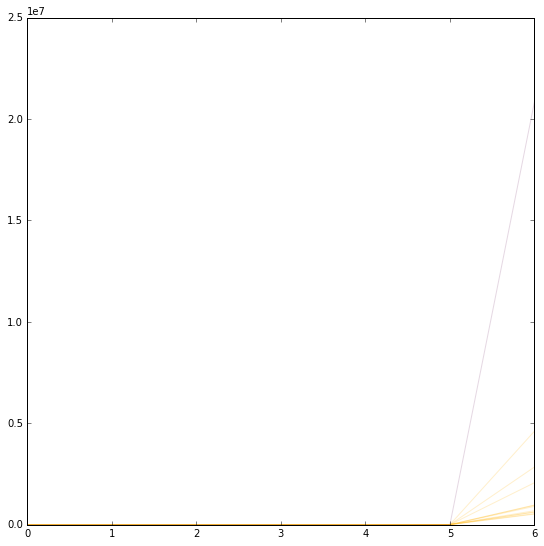

In [75]:
fig = pl.figure(figsize=(20,20))

pl.subplot(2,2,1)
for l in range(2):
    pl.plot(finalcluster[kmlabels2 == l].T, 
            color = kelly_colors_hex[l], alpha = 0.2)
    pl.plot(finalcluster[0][l].T, color = kelly_colors_hex[l], linewidth = 3) #, label = 'KMeans with 2 Clusters')
#pl.xlabel('Cities', fontsize = 15)
#pl.ylabel('Water, electricity..', fontsize = 15)
#pl.suptitle('City Comparison')